# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
'''
1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million)  
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to ﬁve Boston employment centers 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per $10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000s We can see that the input attributes have a mixture of units.
'''

'\n1. CRIM: per capita crime rate by town \n2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. \n3. INDUS: proportion of non-retail business acres per town \n4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) \n5. NOX: nitric oxides concentration (parts per 10 million)  \n6. RM: average number of rooms per dwelling \n7. AGE: proportion of owner-occupied units built prior to 1940 \n8. DIS: weighted distances to ﬁve Boston employment centers \n9. RAD: index of accessibility to radial highways \n10. TAX: full-value property-tax rate per $10,000 \n11. PTRATIO: pupil-teacher ratio by town \n12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town \n13. LSTAT: % lower status of the population \n14. MEDV: Median value of owner-occupied homes in $1000s We can see that the input attributes have a mixture of units.\n'

In [3]:
data=pd.read_csv('/Users/johnngai/Desktop/lab-problems-with-ML/data/boston_data.csv')
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3


In [4]:
# All numberical value float64
data.info()
# No NaN value
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
# 'chas' is the categorical variable 
data.chas.unique()
# data.corr()
corr=data.corr()
corr.round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00,-0.19,0.40,-0.06,0.41,-0.17,0.35,-0.38,0.60,0.57,0.29,-0.38,0.43,-0.40
zn,-0.19,1.00,-0.53,-0.04,-0.50,0.30,-0.55,0.66,-0.31,-0.29,-0.37,0.18,-0.41,0.36
indus,0.40,-0.53,1.00,0.06,0.76,-0.35,0.63,-0.70,0.62,0.72,0.36,-0.38,0.61,-0.50
chas,-0.06,-0.04,0.06,1.00,0.10,0.09,0.08,-0.10,-0.02,-0.04,-0.12,0.04,-0.04,0.14
nox,0.41,-0.50,0.76,0.10,1.00,-0.27,0.73,-0.76,0.61,0.66,0.17,-0.39,0.59,-0.44
rm,-0.17,0.30,-0.35,0.09,-0.27,1.00,-0.21,0.18,-0.17,-0.24,-0.32,0.13,-0.58,0.68
age,0.35,-0.55,0.63,0.08,0.73,-0.21,1.00,-0.73,0.47,0.50,0.23,-0.28,0.60,-0.39
dis,-0.38,0.66,-0.70,-0.10,-0.76,0.18,-0.73,1.00,-0.50,-0.53,-0.21,0.31,-0.50,0.26
rad,0.60,-0.31,0.62,-0.02,0.61,-0.17,0.47,-0.50,1.00,0.92,0.49,-0.47,0.50,-0.42
tax,0.57,-0.29,0.72,-0.04,0.66,-0.24,0.50,-0.53,0.92,1.00,0.47,-0.46,0.54,-0.50


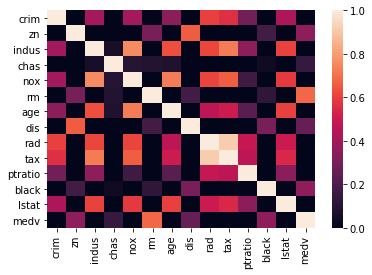

In [6]:
sns.heatmap(corr, vmin=0, vmax=1)

In [7]:
# 'tax' and 'rad' correlation is larger than 0.9 (0.92), it is decided to drop 'rad' 
# because it has lower correlation with 'medv' compard to 'tax', (-0.42 vs -0.50)

# I would also drop 'chas' because it has a low correlation with 'medv' e.g.0.14 and the
# rest of the 'independent variables' e.g. <0.1
data_dropped=data.drop(columns=['rad','chas'])
data_dropped.head()
dcorr=data_dropped.corr()
dcorr.round(2)


,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
crim,1.00,-0.19,0.40,0.41,-0.17,0.35,-0.38,0.57,0.29,-0.38,0.43,-0.40
zn,-0.19,1.00,-0.53,-0.50,0.30,-0.55,0.66,-0.29,-0.37,0.18,-0.41,0.36
indus,0.40,-0.53,1.00,0.76,-0.35,0.63,-0.70,0.72,0.36,-0.38,0.61,-0.50
nox,0.41,-0.50,0.76,1.00,-0.27,0.73,-0.76,0.66,0.17,-0.39,0.59,-0.44
rm,-0.17,0.30,-0.35,-0.27,1.00,-0.21,0.18,-0.24,-0.32,0.13,-0.58,0.68
age,0.35,-0.55,0.63,0.73,-0.21,1.00,-0.73,0.50,0.23,-0.28,0.60,-0.39
dis,-0.38,0.66,-0.70,-0.76,0.18,-0.73,1.00,-0.53,-0.21,0.31,-0.50,0.26
tax,0.57,-0.29,0.72,0.66,-0.24,0.50,-0.53,1.00,0.47,-0.46,0.54,-0.50
ptratio,0.29,-0.37,0.36,0.17,-0.32,0.23,-0.21,0.47,1.00,-0.19,0.35,-0.51
black,-0.38,0.18,-0.38,-0.39,0.13,-0.28,0.31,-0.46,-0.19,1.00,-0.39,0.36


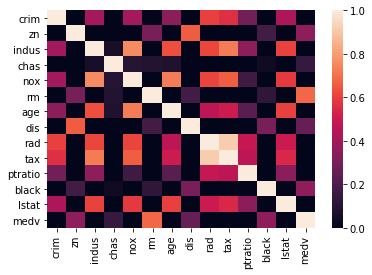

In [8]:
# heatmap
sns.heatmap(corr, vmin=0, vmax=1)

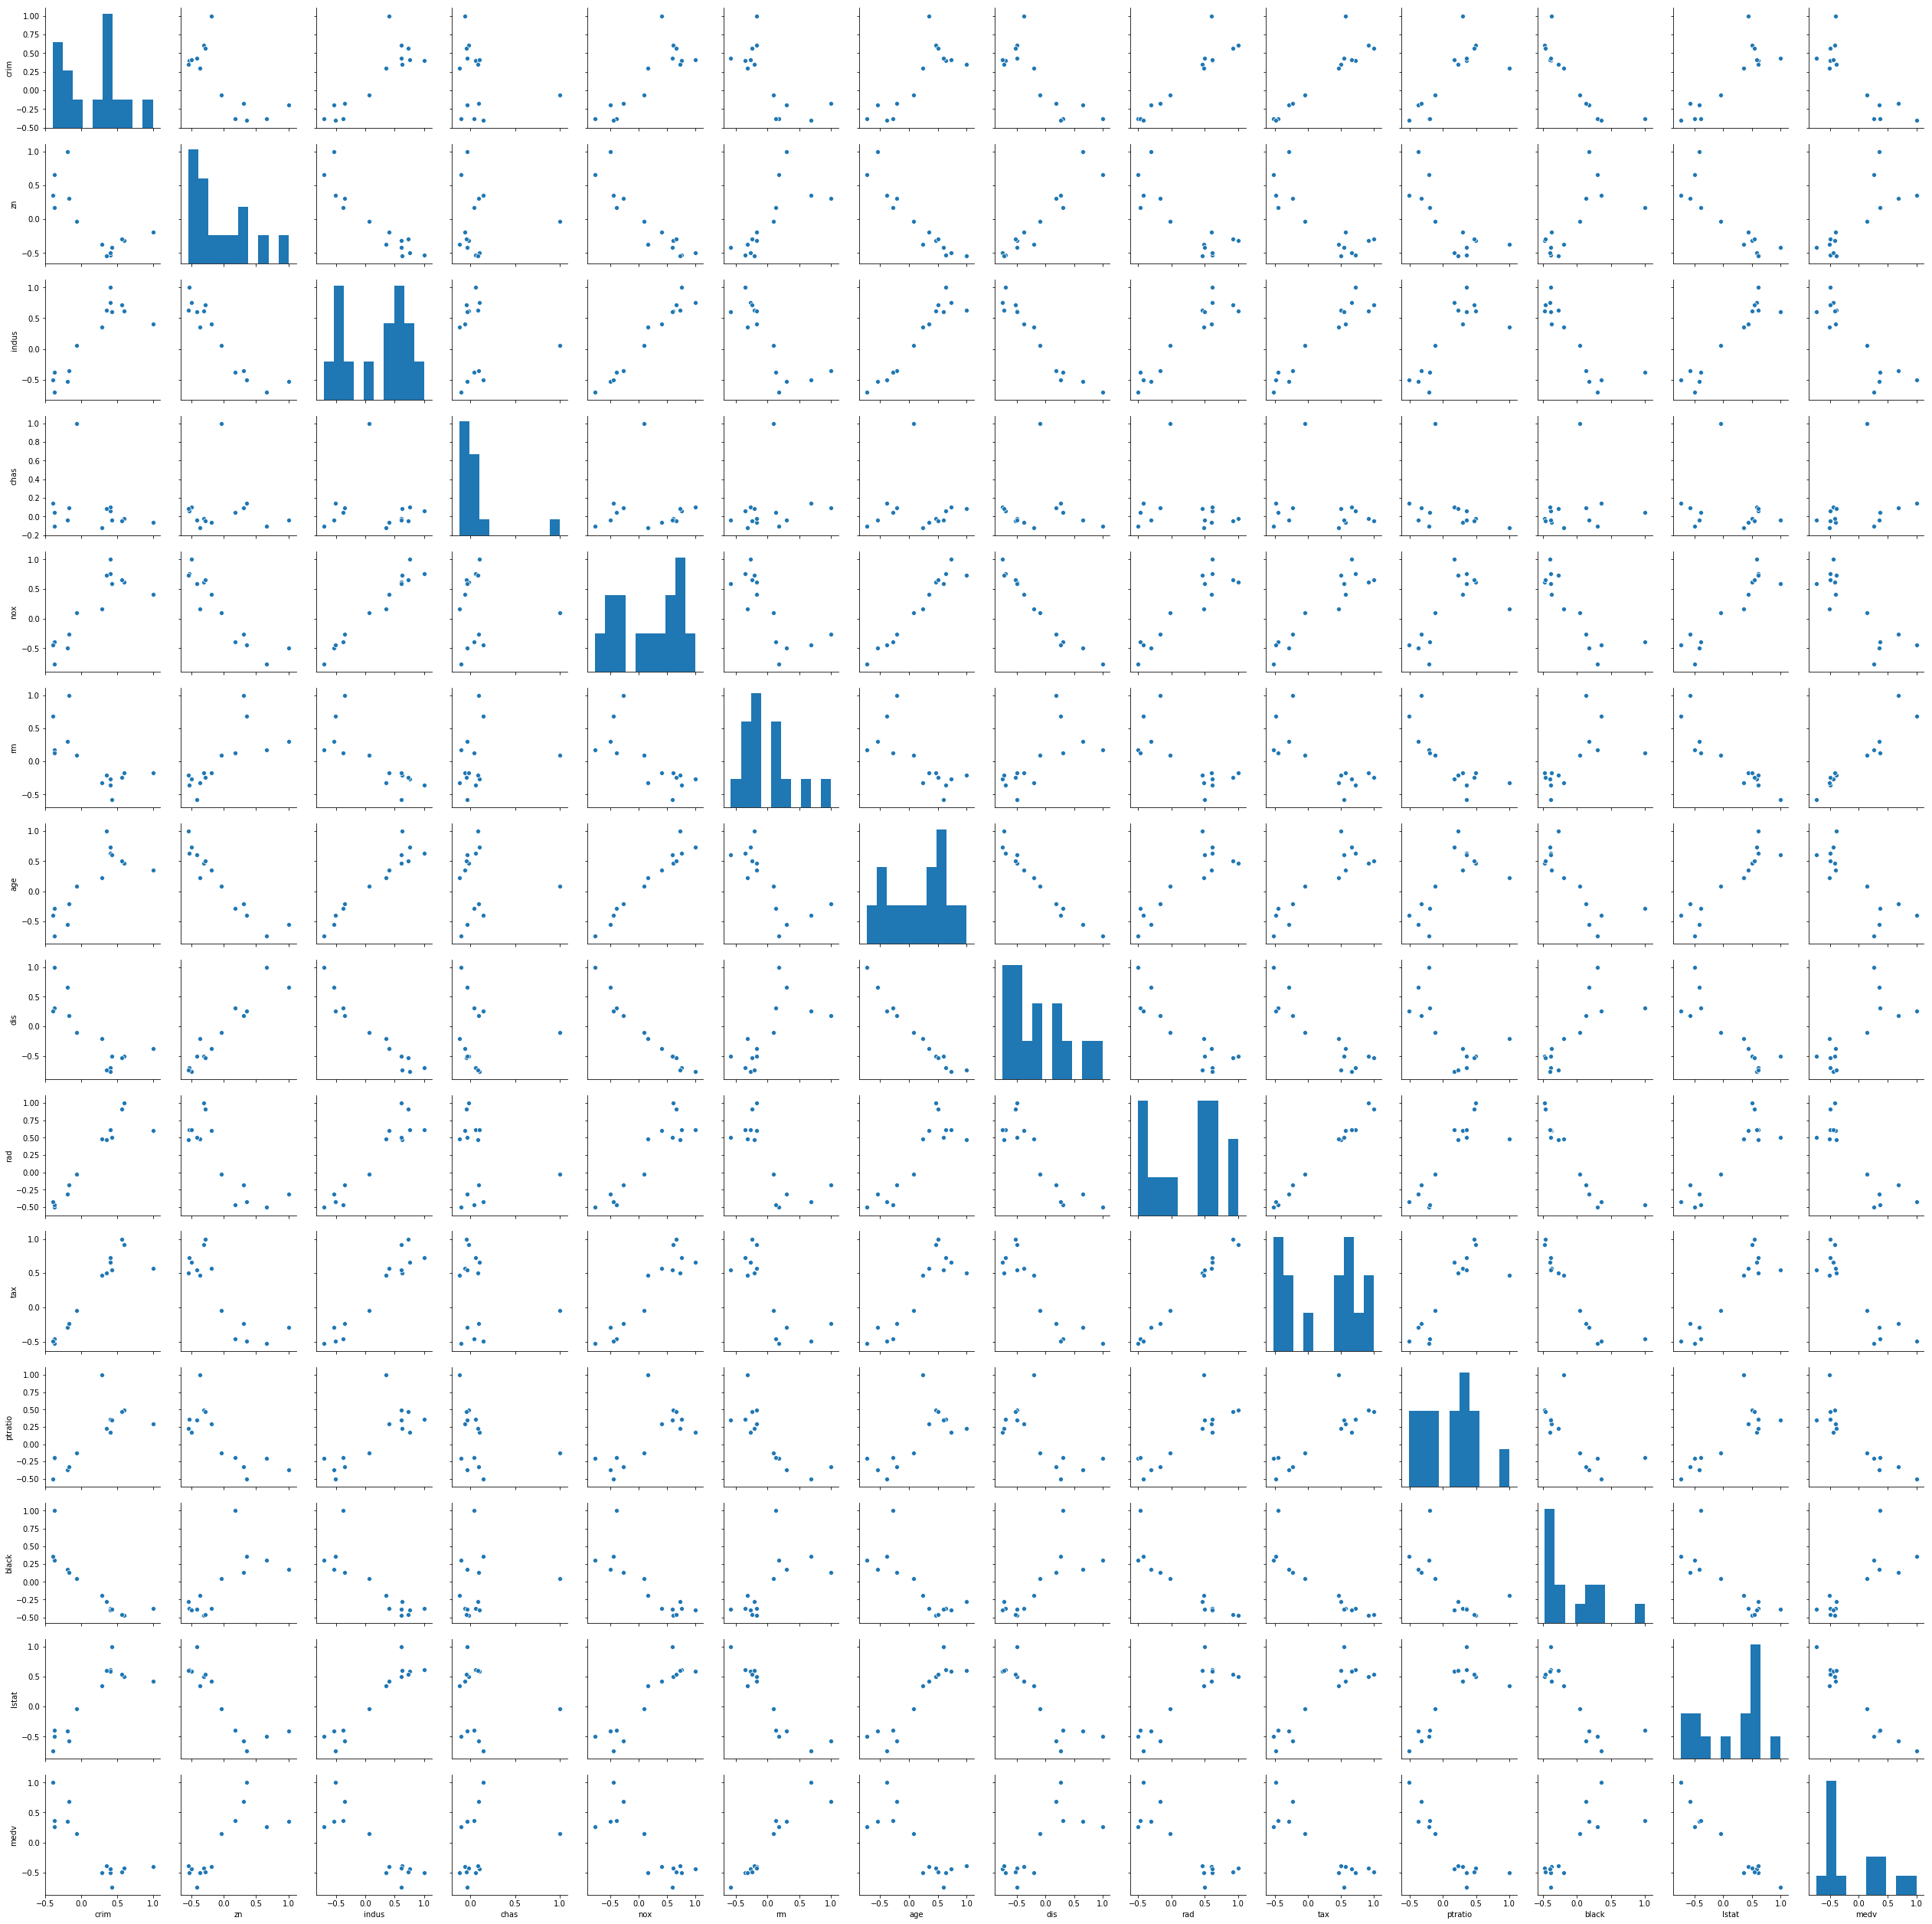

In [9]:
# pairplot
sns.pairplot(corr)

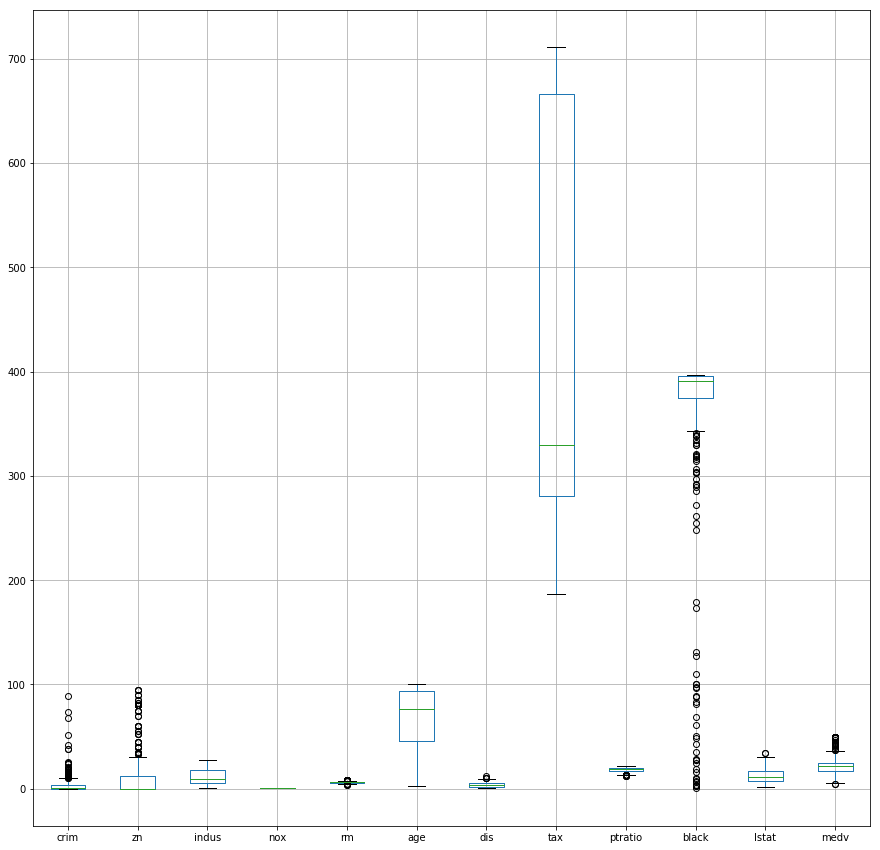

In [10]:
# boxplot
plt.figure(figsize=(15,15))
data_dropped.boxplot()

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

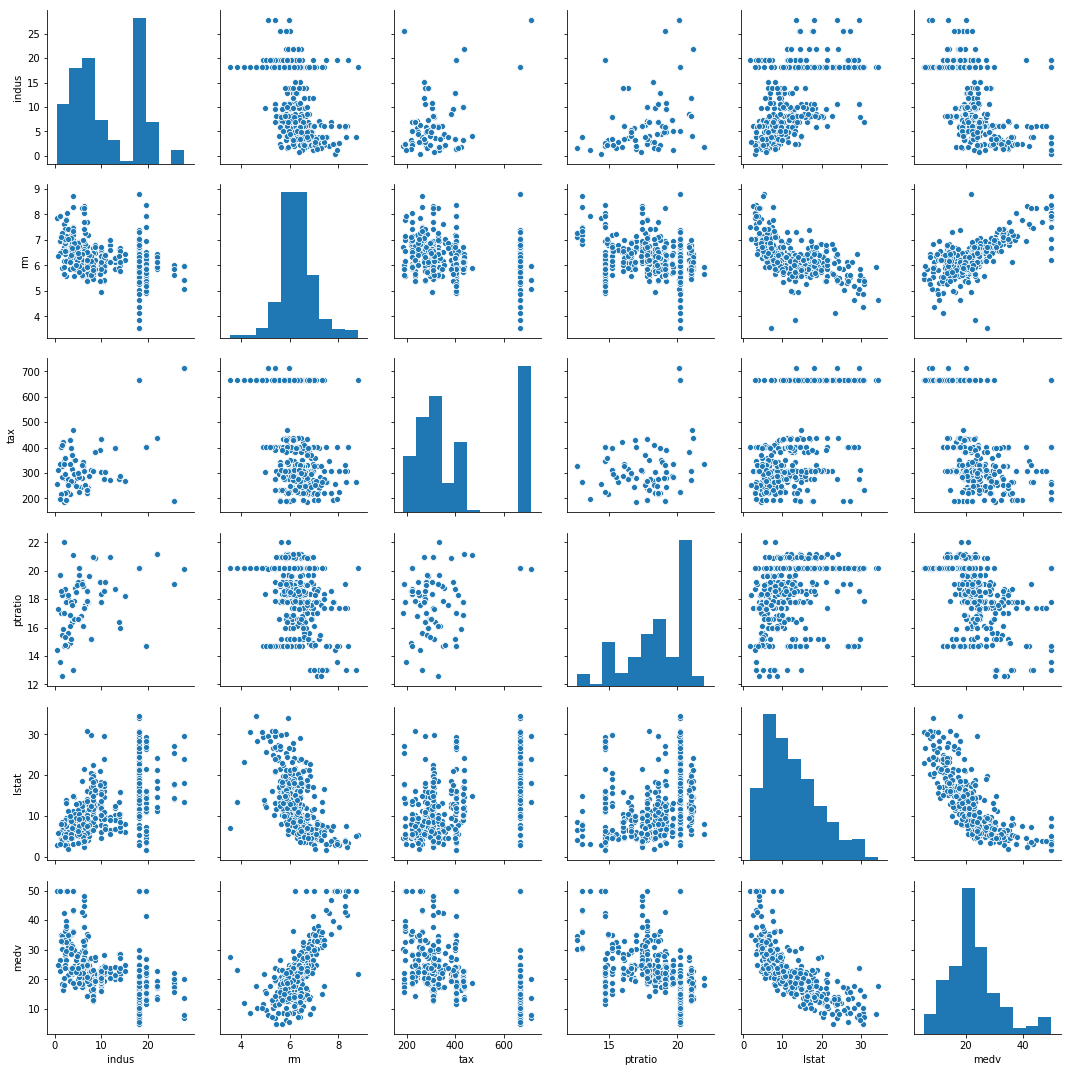

In [11]:
# Your plots here
# I will pick 'indus', 'rm', 'tax', 'ptratio' and 'lstat' all with correlation with 'medv' >= 0.50

data_pick=data_dropped.drop(columns=['crim','zn','nox','age','dis','black'])
sns.pairplot(data_pick)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


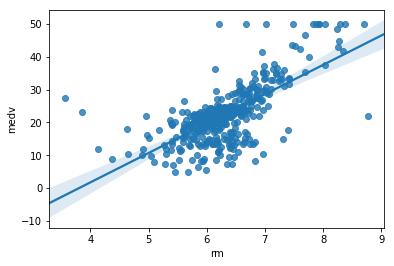

In [12]:
sns.regplot(x="rm", y="medv", data=data_pick)


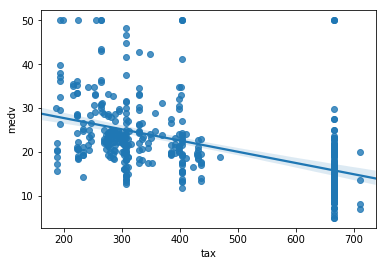

In [13]:
sns.regplot(x="tax", y="medv", data=data_pick)


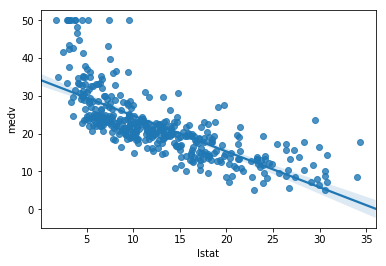

In [14]:
sns.regplot(x="lstat", y="medv", data=data_pick)


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [15]:
# Your response here
# lstat is quite negatively correlated with medv with a well fit regresion line, 
# which make sense because lower income status 
# implies poorer neighborgood, and thus lower housing price

# rm is positively related with well fit regression line,
# the house with more number of room will have a higher price which is what one normally expect

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

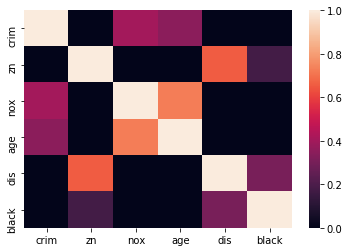

In [16]:
# Your response here
data_remain=data_dropped.drop(columns=data_pick.columns)

corr1=data_remain.corr()
sns.heatmap(corr1, vmin=0, vmax=1)

# High correlations in the remaining variables are not observed.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [17]:
# Your code here
data_pick['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [18]:
from sklearn.metrics import r2_score,explained_variance_score

def performance_metric(y_true, y_predict):
       
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict),explained_variance_score(y_true, y_predict)
                    


In [54]:
from sklearn.model_selection import train_test_split

var=data.drop(columns='medv')
result=data.medv

X_tr, X_te, y_tr, y_te= train_test_split(var,result,test_size=0.2, random_state=26)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [51]:
# Your code here

from sklearn.model_selection import train_test_split
X=data_pick.drop(columns='medv')
y= data_pick.medv

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=26)



----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [67]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

rfr1=RandomForestRegressor(max_depth=1, n_estimators=10)

rfr2=RandomForestRegressor(max_depth=2, n_estimators=10)

rfr4=RandomForestRegressor(max_depth=4, n_estimators=10)

rfr6=RandomForestRegressor(max_depth=6, n_estimators=10)

rfr8=RandomForestRegressor(max_depth=8, n_estimators=10)

rfr10=RandomForestRegressor(max_depth=10, n_estimators=10)



Now, plot the score for each tree on the training set and on the testing set.

In [68]:
# Produce a plot with the score for the testing and training for the different max depths
# With cleaned data
rfr2.fit(X_train,y_train)
y_pred2= rfr2.predict(X_test)
n2=performance_metric(y_test, y_pred4)

rfr4.fit(X_train,y_train)
y_pred4= rfr4.predict(X_test)
n4=performance_metric(y_test, y_pred4)

rfr6.fit(X_train,y_train)
y_pred6= rfr6.predict(X_test)
n6=performance_metric(y_test, y_pred6)

rfr8.fit(X_train,y_train)
y_pred8= rfr8.predict(X_test)
n8=performance_metric(y_test, y_pred8)

rfr10.fit(X_train,y_train)
y_pred10= rfr10.predict(X_test)
n10=performance_metric(y_test, y_pred10)

y=[n2,n4,n6,n8,n10]
print (y)


[(0.8477753178968948, 0.8477935396080346), (0.8588386760602194, 0.8591126984657084), (0.8446746738702104, 0.8448025036270406), (0.8518294037688507, 0.8532559152231752), (0.8461721779715763, 0.8471890720042181)]


In [69]:
# With original data no processing no cleaning as reference for comparison
rfr1.fit(X_tr,y_tr)
y_prediction1= rfr1.predict(X_te)
n_1=performance_metric(y_te, y_prediction1)

rfr2.fit(X_tr,y_tr)
y_prediction2= rfr2.predict(X_te)
n_2=performance_metric(y_te, y_prediction2)

rfr4.fit(X_tr,y_tr)
y_prediction4= rfr4.predict(X_te)
n_4=performance_metric(y_test, y_prediction4)

rfr6.fit(X_tr,y_tr)
y_prediction6= rfr6.predict(X_te)
n_6=performance_metric(y_test, y_prediction6)

rfr8.fit(X_tr,y_tr)
y_prediction8= rfr8.predict(X_te)
n_8=performance_metric(y_test, y_prediction8)

rfr10.fit(X_tr,y_tr)
y_prediction10= rfr10.predict(X_te)
n_10=performance_metric(y_test, y_prediction10)

Y=[n_1,n_2,n_4,n_6,n_8,n_10]
print (Y)

[(0.49580697885374025, 0.520987729051857), (0.6999744074605754, 0.716866526294704), (0.8340167629146326, 0.8357862788302572), (0.8796849108850812, 0.8813993724209646), (0.8504393676502509, 0.8505934153756618), (0.8592583851556754, 0.8597541316077432)]


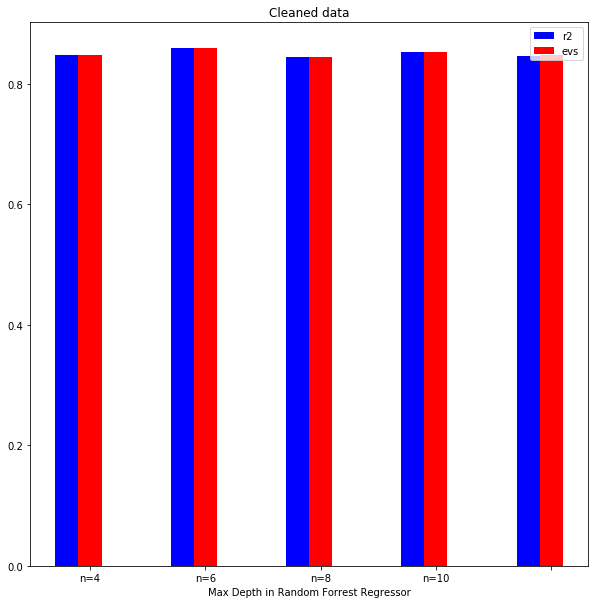

In [70]:
import numpy as np

r2 = [i[0] for i in y]
evs = [i[1] for i in y]
idx=np.arange(5)
width=0.2


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.bar(idx-width,r2,width,color='b',label='r2')
ax.bar(idx,evs,width,color='r',label='evs')
ax.legend()
ax.set_title('Cleaned data')
ax.set_xlabel('Max Depth in Random Forrest Regressor')
ax.set_xticklabels(labels=['n=2','n=4','n=6','n=8','n=10'])
plt.show()

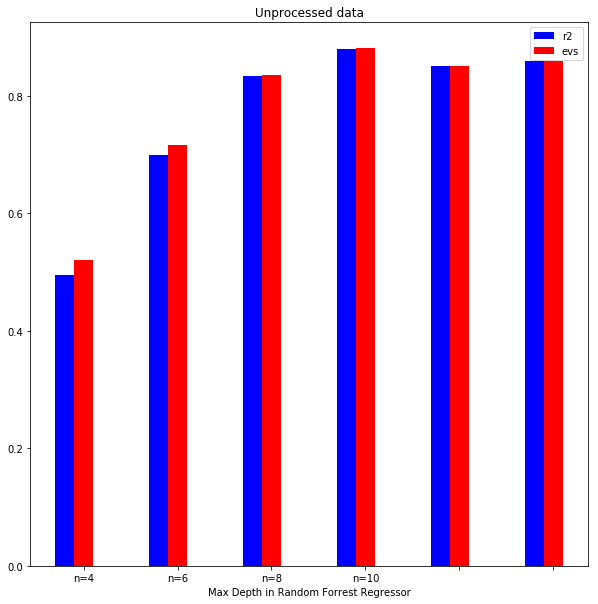

In [71]:
r_2 = [i[0] for i in Y]
e_v_s = [i[1] for i in Y]
idx=np.arange(6)
width=0.2


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.bar(idx-width,r_2,width,color='b',label='r2')
ax.bar(idx,e_v_s,width,color='r',label='evs')
ax.legend()
ax.set_title('Unprocessed data')
ax.set_xlabel('Max Depth in Random Forrest Regressor')
ax.set_xticklabels(labels=['n=1''n=2','n=4','n=6','n=8','n=10'])
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# The depth of trees does not affect result much when it is applied to the cleaned data 
# The performance is worst when max_depth is 1 and increases as the max_depth is increased
# However when i use orignal data to fit the model, it is observed that it works best when max_depth is set to 6.
# And from max_depth onwards, peformance declines. There is an optimal max_depth for different model and as shown above 
# the number of variables affects the sensitivity of performance to max_depth.


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here